# Investigating Fandango Movie Ratings

In [1]:
import pandas as pd

In [2]:
fandahgo_data = pd.read_csv('fandango_score_comparison.csv')

In [3]:
movie_data = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
fandahgo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
fandahgo_data_iso = fandahgo_data[['FILM', 'Fandango_Stars',
                                  'Fandango_Ratingvalue',
                                  'Fandango_votes', 
                                  'Fandango_Difference']].copy()

In [7]:
movie_data_iso = movie_data[['movie', 'year', 'fandango']].copy()

In [11]:
sum(fandahgo_data_iso['Fandango_votes'] < 30)

0

# Isolating the Samples We Need

In [12]:
movie_data_iso.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [14]:
fandahgo_data_iso['Year'] = fandahgo_data_iso['FILM'].str[-5:-1]

In [16]:
fandahgo_data_iso.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [19]:
fandahgo_data_iso['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [20]:
fandahgo_data_iso = fandahgo_data_iso[fandahgo_data_iso['Year'] == '2015'].copy()
fandahgo_data_iso['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [22]:
movie_data_iso['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [24]:
movie_data_iso = movie_data_iso[movie_data_iso['year'] == 2016].copy()
movie_data_iso['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

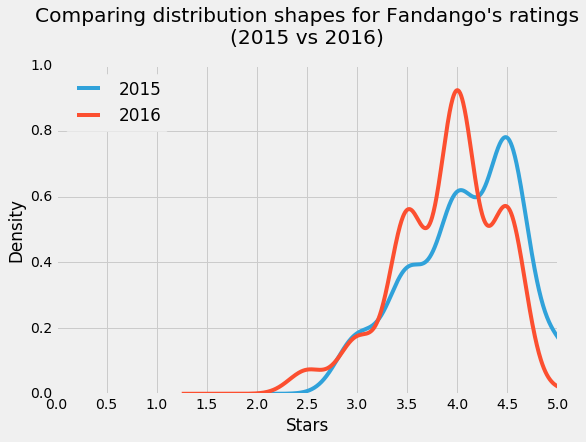

In [25]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandahgo_data_iso['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movie_data_iso['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.05)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

In [26]:
fandahgo_data_iso['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [28]:
movie_data_iso['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [30]:
mean_2015 = fandahgo_data_iso['Fandango_Stars'].mean()
mean_2016 = movie_data_iso['fandango'].mean()

median_2015 = fandahgo_data_iso['Fandango_Stars'].median()
median_2016 = movie_data_iso['fandango'].median()

mode_2015 = fandahgo_data_iso['Fandango_Stars'].mode()[0]
mode_2016 = movie_data_iso['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


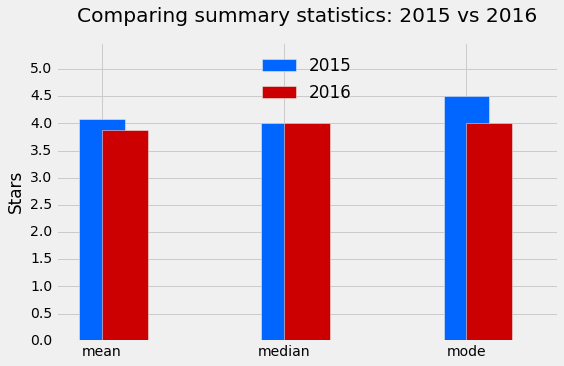

In [32]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.05)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()